In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2024-06-08 07:31:53.621093: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-08 07:31:53.621204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-08 07:31:53.740743: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


The kepler labelled time serise data describe the change in flux (light intensity) of several thousand stars. Each star has a binary label of 2 or 1. Here 2 indicated that that the star is confirmed to have at least one exoplanet in orbit.

In [2]:
df1 = pd.read_csv('/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv')
df2 = pd.read_csv('/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv')
df = pd.concat([df1,df2])

Just to make sure that their are no common values in train and test data, I combined the data and then used drop duplicate to remove the common data points

In [3]:
df.shape

(10174, 3198)

In [4]:
df.drop_duplicates()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [5]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [6]:
df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,10174.000000,1.017400e+04,1.017400e+04,1.017400e+04,1.017400e+04,1.017400e+04,1.017400e+04,1.017400e+04,1.017400e+04,1.017400e+04,...,1.017400e+04,1.017400e+04,1.017400e+04,1.017400e+04,1.017400e+04,1.017400e+04,10174.000000,10174.000000,10174.000000,10174.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084978,2.150563e+04,2.179610e+04,2.191201e+04,2.223257e+04,2.308335e+04,2.410448e+04,2.413990e+04,2.290578e+04,2.102578e+04,...,2.864645e+04,3.551701e+04,4.349749e+04,4.981131e+04,5.086853e+04,5.339716e+04,17843.592448,17721.468265,16272.606439,14459.084864
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.235500e+01,-3.954500e+01,-3.851750e+01,-3.508500e+01,-3.196750e+01,-3.342000e+01,-2.813500e+01,-2.789000e+01,-2.684750e+01,...,-1.761000e+01,-1.948750e+01,-1.757500e+01,-2.076000e+01,-2.227000e+01,-2.444250e+01,-26.760000,-24.067500,-21.137500,-19.825000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.826250e+01,4.432750e+01,4.234250e+01,3.980750e+01,3.976500e+01,3.515000e+01,3.412000e+01,3.171000e+01,3.046750e+01,...,2.213000e+01,2.235500e+01,2.640750e+01,2.910000e+01,2.780500e+01,3.085750e+01,18.192500,18.775000,19.477500,20.285000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [7]:
y = df['LABEL']
X = df.drop('LABEL',axis = 'columns')

In [8]:
y = y - 1

Just for the sake of understanding I replaced 1,2 to 0,1

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: LABEL, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.33, random_state=42)

As we can see that their is need of scaling of the dara because the max value is in order of 10^6 and minimum in order of -10^5

In [11]:
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [12]:
model = Sequential()
model.add(Dense(3197,activation = 'relu',input_dim = 3197))
model.add(Dense(2000,activation = 'relu'))
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(500,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3197)           │    10,224,006 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │     6,396,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     2,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,122,007 (72.94 MB)

 Trainable params: 19,122,007 (72.94 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
 34/110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8842 - loss: 217.4266

I0000 00:00:1717831948.094130      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717831948.109018      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9312 - loss: 222.5217

W0000 00:00:1717831950.126536      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9315 - loss: 222.1414 - val_accuracy: 0.9934 - val_loss: 9.6851
Epoch 2/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9772 - loss: 621.1243 - val_accuracy: 0.9912 - val_loss: 9.4244
Epoch 3/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9752 - loss: 105.9164 - val_accuracy: 0.9949 - val_loss: 37.7246
Epoch 4/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9885 - loss: 27.1172 - val_accuracy: 0.9927 - val_loss: 24.4206
Epoch 5/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9764 - loss: 141.6675 - val_accuracy: 0.9971 - val_loss: 5.8357
Epoch 6/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9896 - loss: 150.0113 - val_accuracy: 0.9949 - val_loss: 9.7572
Epoch 7/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9881 - loss: 9.0606 - val_accuracy: 0.9633 - val_loss: 3.5065
Epoch 8/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9821 - loss: 7.5303 - val_ac

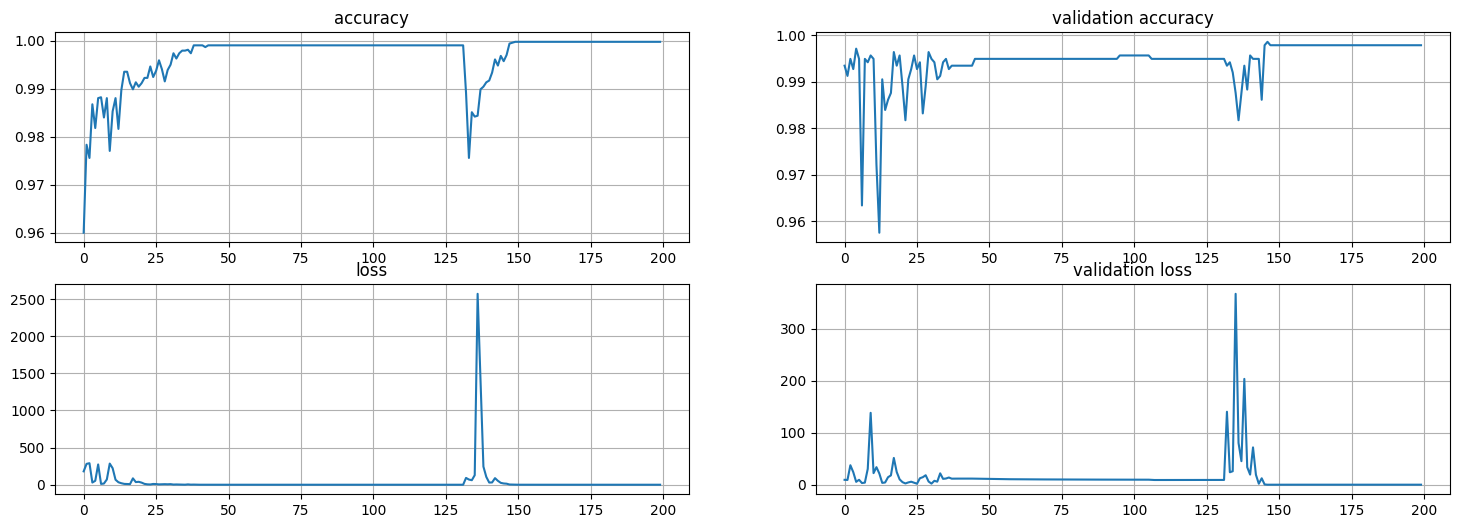

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (18, 6))
for x in history.history.keys() :
    if x == 'accuracy' :
        ax[0][0].plot(history.history[x], label = x)
    elif x == 'val_accuracy' :
        ax[0][1].plot(history.history[x], label = x)
    elif x == 'loss' :
        ax[1][0].plot(history.history[x], label = x)
    else :
        ax[1][1].plot(history.history[x], label = x)
ax[0][0].title.set_text('accuracy')
ax[0][1].title.set_text('validation accuracy')
ax[1][0].title.set_text('loss')
ax[1][1].title.set_text('validation loss')
ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()